## **Team Members (Team Name = REJN)**


1.   Rishiraj Dhokiya
2.   Eric Macwan
3.   Jagruti Pawashe
4.   Nimish Dalvi





## <center> Welcome to Lunathon - 2022

---


##<center>Water Detection - Bullialdus Crater

## Notebook Contents
1. *A brief introduction to Bullialdus crater*
2. *An idea of a .tif file which we will be using ahead*
3. *Image Spectroscopy to get an idea of how to detect water*
4. *The $M^3$ instrument which gave us this .tif data of Bullialdus crater*
5. *The code written in Python to detect the water/hydroxyl in the target band* 

## Bullialdus Crater

<img src = "http://lroc.sese.asu.edu/news/uploads/LROCiotw/bullialdus.png" height = 255 width = 355> 

- *A lunar impact crater located in the western part of the Mare Nubium at 20.7°S, 337.8°E*
- *It is named after a French astronomer Ismaël Boulliau*
- *It has a diameter of about 60 km*  
- *The central peak of Bullialdus is about a kilometer high*      
- *Our target for this notebook to detect the presence of water/hydroxyl*

## TIFF Data

<img src = "https://www.online-tech-tips.com/wp-content/uploads/2020/04/tiff-file.jpg" height = 255 width = 355> 

- *TIFF stands for Tag Image File Format*    
- *An image file format for storing raster graphics images*  
- *A raster graphic represents a two-dimensional picture as a rectangular matrix or grid of square pixels*
- *Used primarily for storing multiple images in a single file*
- *Supports 8 and 16-bpc (bits per channel) resulting in support of upto 48 bit images with varying transparency*
- *Most efficient in transporting files and keeping them together*
- *The only bad side is that it often creats large file sizes due to multiple storage of images*

## Image Spectroscopy
<img src = "https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/GUID-4F5A176A-D52A-4F07-9C2E-9922C1B6097D-web.gif" height = 255 width = 330> <img src = "https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/GUID-00169CC7-2911-4018-8C3F-39738C5426DB-web.gif" height = 255 width = 330> <img src = "https://scontent.famd5-3.fna.fbcdn.net/v/t39.30808-6/294576897_5636000876444009_6903139564656169329_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=730e14&_nc_ohc=NuDJ-a_3F0QAX-DrXBz&_nc_ht=scontent.famd5-3.fna&oh=00_AT_x9zznVWQ6KPI87uyLmQWYZnZg3gMj698UOfzAyedvrg&oe=62DA8770" height = 255 width = 330> 


- *Spectral systems have one band per wavelength range*
- *Images of spectral systems are grey unless they are combined and assigned color*
- *A satellite image, for example, commonly has multiple bands representing different wavelengths,*    
  * *From the ultraviolet through the visible and infrared portions of the electromagnetic spectrum*
- *One application is spectral geophysical imaging,*
  * *It allows quantitative and qualitative characterization of the surface and atmosphere using radiometric measurements*
- *Relectance Spectroscopy is a powerful technique for the remote determination of the composition of soils and regoliths on the surfaces of bodies of the solar system, as well as powders in the laboratory*
  * *We do so by plotting the reflectance spectra and look for peaks at different wavelengths whose data we already have and match it*
  * *For example, a peak at about 2.8 $\mu$m in the third figure above is indicating the presence of water/hyroxyl in the Bullialdus Crater*


## Moon Mineralogy Mapper ($M^3$) Instrument

<img src = "https://upload.wikimedia.org/wikipedia/commons/7/75/Moon_Mineralogy_Mapper_left.jpg" label = "moon minerology mapper" height = 255 width = 355>

- *A geophysical image spectrometer made by NASA's Jet Propulsion Laboratory*  
- *It was contributed to India's first mission to the Moon - Chandrayaan 1*  
- *It provided the first mineralogical map of the lunar suface*  
- *One of its biggest discoveries - found water molecules in the polar regions of the moon*
- *Data from $M^3$ provide  an opportunity to examine Bullialdus Crater*
  * *Both at high spatial (∼140 m per pixel) and spectral (20–40 nm sampling) resolution*
  * *It measures the spectral range from from 430 nm to 3000 nm*

## Importing necessary libraries


In [ ]:
# Geospatial Data Abstraction Library
from osgeo import gdal             # A translator library for raster and vector geospatial data formats

# Numerical Python Library
import numpy as np                 # To work with arrays

# Matplotlib Library
import matplotlib.pyplot as plt    # For plotting the data

# OpenCV Library
import cv2                         # For image processing tool

# Pandas library
import pandas as pd                # For table making

# Copy library
import copy                       # for making any shallow coppy

## Bullialdus Crater Image Data
Download and upload this [tif file](https://drive.google.com/file/d/1v-SwvdE4szTVyF_TDfdpHFk6U4CGcRWu/view?usp=sharing) on Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DEEP LEARNING/lunathon')
!dir


Bullialdus_m3_tiff.tif	Lunathon_workshop_notebook.ipynb


In [ ]:
## Opening the data 
data = gdal.Open(r"Bullialdus_m3_tiff.tif")

In [ ]:
## Total bands in our image data
data.RasterCount

83

In [ ]:
## Array containing all the bands
bandarrays = np.asarray([data.GetRasterBand(i+1).ReadAsArray() for i in range(data.RasterCount)])
bandarrays.shape

(83, 456, 304)


Algorithm can be found on [page 9](https://static-content.springer.com/esm/art%3A10.1038%2Fngeo1909/MediaObjects/41561_2013_BFngeo1909_MOESM602_ESM.pdf)


In [ ]:
## Applying algorithm sensitive to Hydroxyl	absorption	

## Example : Vegetation on earth surface  - NDVI  = (NIR - R) / (NIR + R)
final = 1 - (bandarrays[78] / (((bandarrays[82] - bandarrays[75]) / 279.5) * 119.8 + bandarrays[75]))
final.shape

(456, 304)

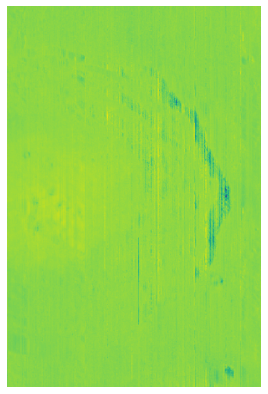

In [ ]:
## Display the output after applying the algorithm
plt.figure(figsize = (8, 7))
plt.axis('off')
plt.imshow(final)

In [ ]:
## Minimum and maximums value of the pixels in above image
print(f"Range of pixels for above image:- ({final.min()}, {final.max()})")

Range of pixels for above image:- (-0.46501898765563965, 0.10983282327651978)


In [ ]:
## Scaling the pixels between 0 to 1
final_v3 = final - final.min()
final_v3[np.logical_and(final_v3 >= 0.5, final_v3 <= 0.505)] = 1
print(f"Range of pixels after scaling:- ({final_v3.min()}, {final_v3.max()})")

Range of pixels after scaling:- (0.0, 1.0)


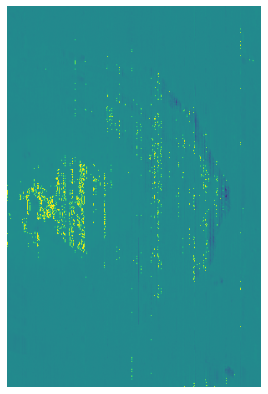

In [ ]:
## Display the output after scaling
plt.figure(figsize = (8, 7))
plt.axis("off")
plt.imshow(final_v3)

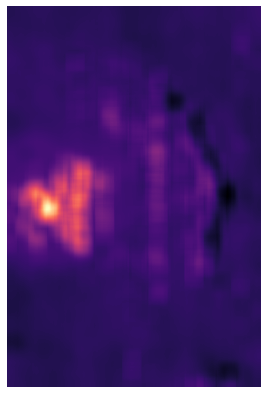

In [ ]:
## Blur the image
blur = cv2.GaussianBlur(final_v3,(23,23), 11)
plt.figure(figsize = (8, 7))
plt.axis("off")
plt.imshow(blur, cmap = "magma")
plt.show()

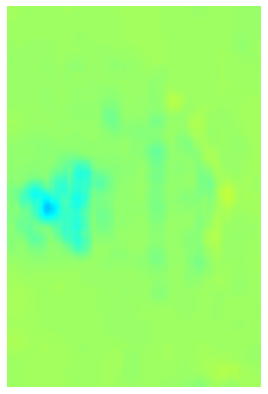

In [ ]:
## Convert the pixels data type to uint8 (0 to 255)
blur = (blur*255).astype(np.uint8)
heatmap_img = cv2.applyColorMap(blur, cv2.COLORMAP_JET)
plt.figure(figsize = (8, 7))
plt.axis("off")
plt.imshow(heatmap_img, cmap = "magma")

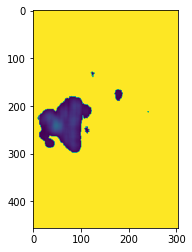

In [ ]:
simp2 = blur.copy()
for i in range(simp2.shape[0]):
  for j in range(simp2.shape[1]):
    if simp2[i][j] <= 130:
      simp2[i][j] = 255
plt.imshow(simp2)

In [ ]:
## Add the two images (blured and band 79)
super_imposed_img = cv2.addWeighted(blur, 0.5, (bandarrays[78]*255).astype(np.uint8), 0.5, 0)
super_imposed_img

array([[76, 78, 80, ..., 80, 80, 80],
       [78, 77, 78, ..., 80, 80, 80],
       [78, 78, 78, ..., 80, 80, 80],
       ...,
       [80, 80, 80, ..., 80, 77, 76],
       [80, 79, 80, ..., 80, 78, 76],
       [79, 79, 80, ..., 80, 79, 77]], dtype=uint8)

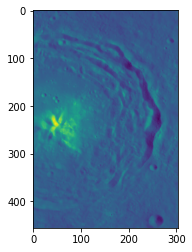

In [ ]:
plt.imshow(super_imposed_img)

## Problem statement
1. *Find the brightest pixel value and its location*
2. *Create a function to extract all pixel values that are brighter than a particular value along with its location in form of a table*
3. *Display a black arrow in the super imposed image locating the brightest pixel*

In [ ]:
## Define the function to get brightest pixel values and its location
def brightest_pixels(image, condition_value):
  """
  image - the super imposed image
  condition_value - the value above which all the pixels shall be extracted
  """
  location=[]
  
  simp1 =super_imposed_img.copy()
  for i in range(simp1.shape[0]):
    for j in range(simp1.shape[1]):
      if simp1[i][j] > condition_value:
        temp=int(super_imposed_img[i][j])
        location.append([i,j,temp])
        simp1[i][j] = 255
      else:
        simp1[i][j] = 0
    ## Printing the table 
  plt.imshow(simp1)
  df=pd.DataFrame(location,columns=["X-Location","Y-Location","Value"])

  return df

  """
  this function will return the tabulated form of pixels and its respective location on super imposed image
  """

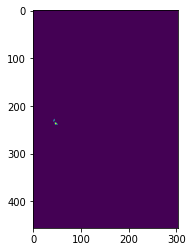

In [ ]:
## Call the function to print the summary table

# Use the below condition value
condition_value = 130

# Call the function
table=brightest_pixels(super_imposed_img,condition_value)


### 1.Brightest pixel value with its location 

In [ ]:
ind=np.argmax(table["Value"])
table.iloc[3]


X-Location    231
Y-Location     43
Value         134
Name: 3, dtype: int64

The above values shows the brightest pixel value & its location.(i.e. X-location & Y-location).

### 2.All pixel values that are brighter than a particular value along with its location in form of a table

In [ ]:
table

,X-Location,Y-Location,Value
0,228,44,132
1,229,44,132
2,230,44,132
3,231,43,134
4,231,44,132
5,232,43,131
6,235,46,131
7,235,47,131
8,236,46,132
9,236,47,134


A function is created in the above blocks which extracts all the pixel values that are brighter than a particular value along with its location in form of a table.

### 3.Displaying a black arrow in the super imposed image locating the brightest pixel

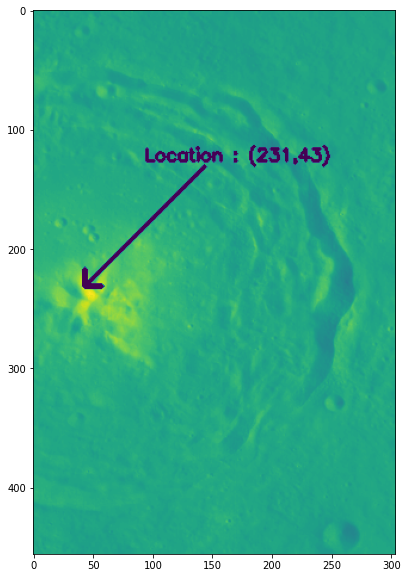

In [ ]:

X_cord=table["Y-Location"][ind]
Y_cord=table["X-Location"][ind]

img=super_imposed_img.copy()
## Display the superimposed image along with the location of any of the brightest pixel from your table

# Write your code here      
plt.figure(figsize=[10,10])
# img=cv2.circle(super_imposed_img,center=(50,239),radius=25,color=(1,1,1),thickness=2)
img=cv2.arrowedLine(img,  (X_cord+100,Y_cord-100),(X_cord,Y_cord),color=(0,0,0), thickness=3,)
font = cv2.FONT_HERSHEY_SIMPLEX
title="Location : ("+ str(Y_cord) + "," + str(X_cord)+")"
img=cv2.putText(img,text=title,org=(X_cord+50,Y_cord-105),fontFace = font,fontScale=0.5,color=(0,0,0),thickness=2)
plt.imshow(img)  

The Black arrow in the above image which locates the value of the brightest pixel value to be observed.

In [1]:
# Print your conclusion here

print("We conclude with the pixel value of 231,43 which shows the brightest pixel value observed by us. ")

We conclude with the pixel value of 231,43 which shows the brightest pixel value observed by us. 


## Problem statement idea

*Your team will develop an extraction system for water on the location identified by your coding on the Bullialdus crater.*

***Let's get back to the presentation for a detailed information on this.***

---
# <center> THE END